# 📈 Day 4: Evaluation & Visualization
SentimentSense Project - Visualizations & Confusion Matrix

In [2]:
!pip install wordcloud


   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   -- ------------------------------------ 20.5/299.9 kB 320.0 kB/s eta 0:00:01
   ------ -------------------------------- 51.2/299.9 kB 525.1 kB/s eta 0:00:01
   ------------------------ --------------- 184.3/299.9 kB 1.4 MB/s eta 0:00:01
   ------------------------------- -------- 235.5/299.9 kB 1.6 MB/s eta 0:00:01
   ------------------------------- -------- 235.5/299.9 kB 1.6 MB/s eta 0:00:01
   ------------------------------- -------- 235.5/299.9 kB 1.6 MB/s eta 0:00:01
   ------------------------------- -------- 235.5/299.9 kB 1.6 MB/s eta 0:00:01
   ------------------------------- -------- 235.5/299.9 kB 1.6 MB/s eta 0:00:01
   -------------------------------- ----- 256.0/299.9 kB 628.5 kB/s eta 0:00:01
   -------------------------------------  297.0/299.9 kB 632.9 kB/s eta 0:00:01
   -------------------------------------  297.0/299.9 kB 632.9 kB/s eta 0:00:01
   -------------------------------------  297.0/2

In [1]:
# 📦 Imports
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import joblib
import pandas as pd

In [3]:
import joblib

model = joblib.load("sentiment_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")


In [5]:
import pandas as pd
import joblib

df = pd.read_csv("../data/sentiment140_processed.csv")

# Safe fallback
df['processed_text'] = df['processed_text'].fillna("")

# Load saved model and vectorizer
model = joblib.load("sentiment_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

# Transform processed text
X = vectorizer.transform(df['processed_text'])
y = df['target']

# Predict
y_pred = model.predict(X)


In [7]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Load data
df = pd.read_csv("../data/sentiment140_processed.csv")

# Fix missing values
df['processed_text'] = df['processed_text'].fillna("")

# Convert labels to 0/1
df['target'] = df['target'].map({'negative': 0, 'positive': 1})

# Load model and vectorizer
model = joblib.load("sentiment_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

# Transform and predict
X = vectorizer.transform(df['processed_text'])
y = df['target']
y_pred = model.predict(X)

# Evaluation
print("✅ Accuracy:", accuracy_score(y, y_pred))
print("✅ F1 Score:", f1_score(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred))


✅ Accuracy: 0.80365
✅ F1 Score: 0.8062940857297883

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80      9942
           1       0.80      0.81      0.81     10058

    accuracy                           0.80     20000
   macro avg       0.80      0.80      0.80     20000
weighted avg       0.80      0.80      0.80     20000



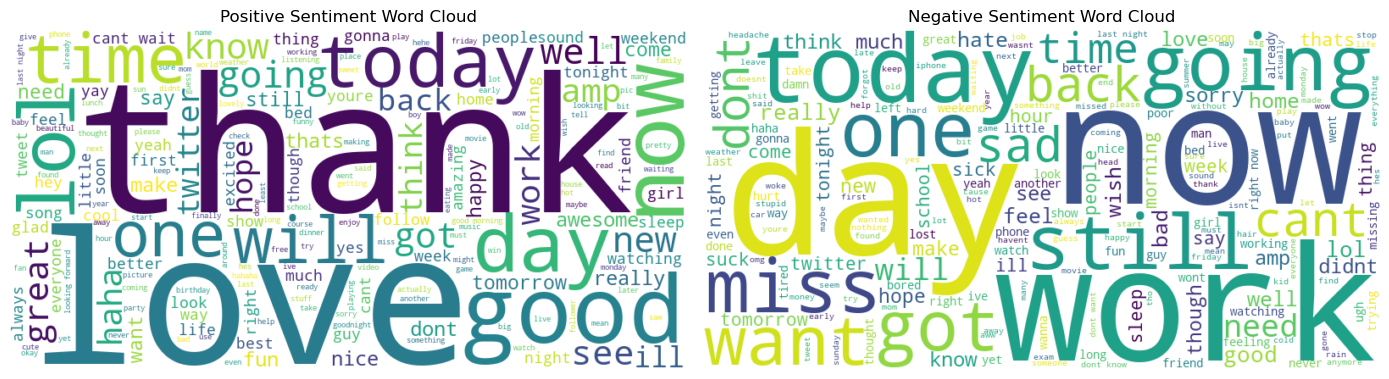

In [8]:
# ☁️ Word Clouds by Sentiment
positive_text = " ".join(df[df["target"] == 1]["processed_text"])
negative_text = " ".join(df[df["target"] == 0]["processed_text"])
wc = WordCloud(width=800, height=400, background_color="white")

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.imshow(wc.generate(positive_text), interpolation='bilinear')
plt.title("Positive Sentiment Word Cloud")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wc.generate(negative_text), interpolation='bilinear')
plt.title("Negative Sentiment Word Cloud")
plt.axis('off')
plt.tight_layout()
plt.show()

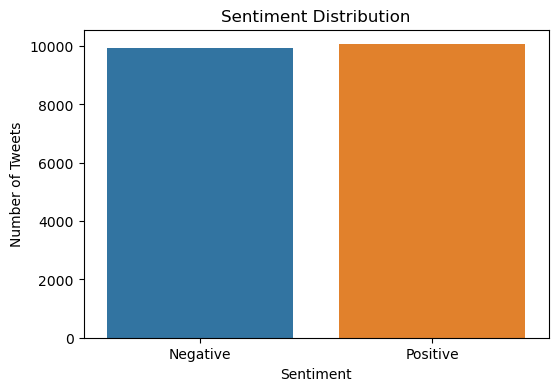

In [9]:
# 📊 Sentiment Distribution (Bar Chart)
sentiment_counts = df['target'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.title("Sentiment Distribution")
plt.ylabel("Number of Tweets")
plt.xlabel("Sentiment")
plt.show()

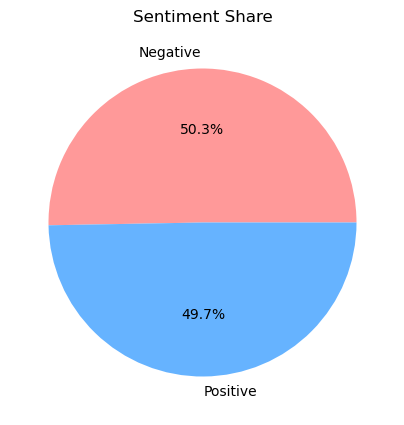

In [10]:
# 🥧 Sentiment Distribution (Pie Chart)
plt.figure(figsize=(5,5))
plt.pie(sentiment_counts, labels=["Negative", "Positive"], autopct='%1.1f%%', colors=["#ff9999", "#66b3ff"])
plt.title("Sentiment Share")
plt.show()